In [1]:
'''Importación de librerías necesarias para la elaboración del modelo de Árbol de Decisión'''
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

In [2]:
'''Carga del dataset que se va a utilizar'''
df = pandas.read_csv('dataset3.csv')
print(df)

      mora  atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro  ingreso  \
0        0     235         1    30      3748      93             5  3500.00   
1        0      18         1    32      4598       9            12   900.00   
2        0       0         1    26      5148       8             2  2400.00   
3        0       0         1    36      5179      20            12  2700.00   
4        0       0         1    46      3960       3             1  3100.00   
...    ...     ...       ...   ...       ...     ...           ...      ...   
3747     1       9         1    53      8282       3            12  3500.00   
3748     1       0         1    47      5847      47            12  1388.25   
3749     1       0         1    31      3991      10            12  2100.00   
3750     1       2         2    28      4995       9            12  1047.29   
3751     1      51         2    33      4935      27            12  1434.96   

       linea_sf  deuda_sf  score  zona  clasif_sbs 

In [3]:
'''Definición de las características, estas características aportarán al objetivo del modelo'''
X= df.drop(['mora'], axis=1 )
X.columns

Index(['atraso', 'vivienda', 'edad', 'dias_lab', 'exp_sf', 'nivel_ahorro',
       'ingreso', 'linea_sf', 'deuda_sf', 'score', 'zona', 'clasif_sbs',
       'nivel_educ'],
      dtype='object')

In [4]:
'''Definición de la variable dependiente, la columna con los valores que intentamos predecir'''
y = df['mora']
y

0       0
1       0
2       0
3       0
4       0
       ..
3747    1
3748    1
3749    1
3750    1
3751    1
Name: mora, Length: 3752, dtype: int64

In [5]:
'''Creación del árbol de decisión y construcción de un clasificador a partir de la X y la Y'''
modelo = DecisionTreeClassifier(max_depth=3)
modelo = modelo.fit(X, y)

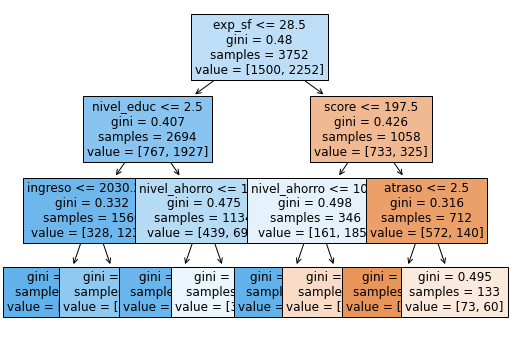

In [6]:
'''Se guarda el árbol de decision en una imagen'''
plt.figure(figsize=(8,6))
plot_tree(decision_tree=modelo,feature_names=X.columns,filled=True,fontsize=12);

In [7]:
'''Predicción de la Y'''
y_prediccion = modelo.predict(X)
y_prediccion.shape

(3752,)

In [8]:
'''Calculo del TrueNegative, FalsePositive, FalseNegative y TruePositive mediante función de python'''
tn, fp, fn, tp = confusion_matrix(y, y_prediccion).ravel()
(tn, fp, fn, tp)

(717, 783, 245, 2007)

In [9]:
'''Calculo de la Exactitud, Exhaustividad y Precisión del modelo 
mediante fórmulas matermáticas'''
Exactitud = (tp+tn)/(tn+ fp+fn+tp)
Exhaustividad = tp/(tp+fn)
Precision = tp/(tp+fp)

In [10]:
'''Impresión de de la Exactitud, Precisión y Exhaustividad del modelo 
mediante funciones de python y mediante fórmulas matermáticas'''
print("Accuracy con funciones:", metrics.accuracy_score(y, y_prediccion))
print("Accuracy calculado:", Exactitud)
print("Precision con funciones:", metrics.precision_score(y, y_prediccion))
print("Precision calculado:", Precision)
print("Recall con funciones:", metrics.recall_score(y, y_prediccion))
print("Exhaustividad calculado:", Exhaustividad)

Accuracy con funciones: 0.7260127931769723
Accuracy calculado: 0.7260127931769723
Precision con funciones: 0.7193548387096774
Precision calculado: 0.7193548387096774
Recall con funciones: 0.8912078152753108
Exhaustividad calculado: 0.8912078152753108


In [11]:
'''Creación de la matriz de confusión mediante crosstab 
(los valores concuerdan TrueNegative, FalsePositive, FalseNegative y TruePositive calculados anteriormente)'''
matriz_Confusion = pd.crosstab(y, y_prediccion, rownames=['Actual'], colnames=['Predicción'])
matriz_Confusion

Predicción,0,1
Actual,,
0,717,783
1,245,2007


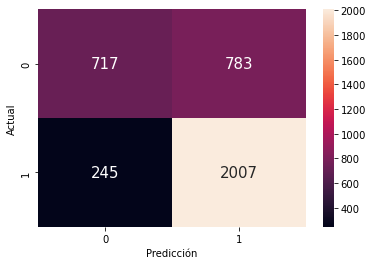

In [12]:
'''Gráfica de la matriz de confusión mediante heatmap'''
sn.heatmap(matriz_Confusion, annot=True,  annot_kws={'size': 15}, fmt = "d")
plt.show()